## Iris dataset: exploratory data analysis & Classification Algorithm

### Objective:
<p>I am currently working through the thinkStats ver2 textbook by Allen Downey. I'm not too particularly interested in whether first babies arrive late, nor, and most importantly, do I cement concepts well by following a book's working dataset (too much passive coding). Instead, I've found applying concepts to another dataset of interest is most effective.</p>
<p>The dataset I will explore using this book (at least in part) is the simple, yet timeless iris dataset. The objective is to do exploratory data analysis, stepping through those steps and then to implement a classification algorithm to predict flower species.</p>

<b>Dataset Information:</b>
<p>A widely used dataset in pattern classification. It contains 3 classes of plant species with 50 instances of each. <b>One class is linearly separable</b>, but the others are not.</p>

#### Imports

In [5]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# set to default, more asthetically appealing plots
pd.options.display.mpl_style = 'default'

#### Dataset

In [6]:
# read in iris data set 
iris_data_path = "../datasets/iris.data.txt"
iris = pd.read_csv(iris_data_path)

# change columns to feature names
feature_cols = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'species']
iris.columns = feature_cols

In [7]:
# snapshot of data
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Notes: sepal length and width is > petal length and width for iris-setosa. Does this hold for other species too?

In [8]:
# quick look at the summary number values
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Notes: it appears on average the sepal length is almost 2 cm > than petal length (same goes for width as well)

#### Histograms

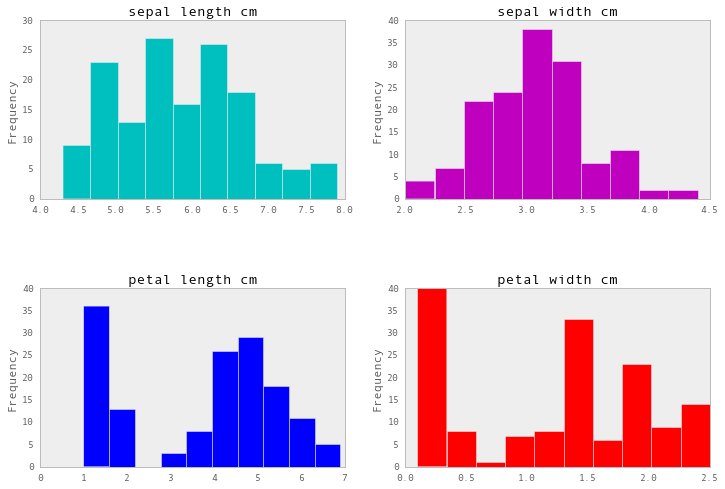

In [45]:
# let's look at histograms of the distributions
fig, axes = plt.subplots(2,2, figsize=(12,8))
iris.sepal_length_cm.plot.hist(ax=axes[0,0],color='c',grid=False)
axes[0,0].set_title('sepal length cm')
iris.sepal_width_cm.plot.hist(ax=axes[0,1], color='m',grid=False)
axes[0,1].set_title('sepal width cm')
iris.petal_length_cm.plot.hist(ax=axes[1,0],color='b',grid=False)
axes[1,0].set_title('petal length cm')
iris.petal_width_cm.plot.hist(ax=axes[1,1],color='r',grid=False)
axes[1,1].set_title('petal width cm')

Notes: first observation seems to show that the sepal length and width are somewhat normally distributed. The left tail is longer on both the sepal length and width. The petal length however is not normally distributed. 

...on second glance the sepal length also may not be normally distributed either. 

<h4>Histogram Notes:</h4>
<p>A histogram is a common representation of a variable distribution. It shows the frequency of values, meaning the number of times the value appears in the dataset.</p>


#### Outliers

In [61]:
# lets look at the 5 highest and lowest values for each variable, checking for erroneous data

# sepal len
slen = iris.sepal_length_cm.value_counts(ascending=True).sort_index()
print "sepal length min and frequencies: "
print slen.iloc[:5]
print "sepal length max and frequencies: "
print slen.sort_index(ascending=False).iloc[:5]

# sepal wid
swid = iris.sepal_width_cm.value_counts(ascending=True).sort_index()
print "sepal weidth min and frequencies: "
print swid.iloc[:5]
print "sepal width max and frequencies: "
print swid.sort_index(ascending=False).iloc[:5]

# petal len
plen = iris.petal_length_cm.value_counts(ascending=True).sort_index()
print "petal length min and frequencies: "
print plen.iloc[:5]
print "petal length max and frequencies: "
print plen.sort_index(ascending=False).iloc[:5]

# petal wid
pwid = iris.petal_width_cm.value_counts(ascending=False).sort_index()
print "petal width min and frequencies: "
print pwid.iloc[:5]
print "petal width max and frequencies: "
print pwid.sort_index(ascending=False).iloc[:5]

# print slen.iloc[:5]
# print swid.iloc[:5]




sepal length min and frequencies: 
4.3    1
4.4    3
4.5    1
4.6    4
4.7    2
Name: sepal_length_cm, dtype: int64
sepal length max and frequencies: 
7.9    1
7.7    4
7.6    1
7.4    1
7.3    1
Name: sepal_length_cm, dtype: int64
sepal weidth min and frequencies: 
2.0    1
2.2    3
2.3    4
2.4    3
2.5    8
Name: sepal_width_cm, dtype: int64
sepal width max and frequencies: 
4.4    1
4.2    1
4.1    1
4.0    1
3.9    2
Name: sepal_width_cm, dtype: int64
petal length min and frequencies: 
1.0     1
1.1     1
1.2     2
1.3     7
1.4    11
Name: petal_length_cm, dtype: int64
petal length max and frequencies: 
6.9    1
6.7    2
6.6    1
6.4    1
6.3    1
Name: petal_length_cm, dtype: int64
petal width min and frequencies: 
0.1     6
0.2    27
0.3     7
0.4     7
0.5     1
Name: petal_width_cm, dtype: int64
petal width max and frequencies: 
2.5    3
2.4    3
2.3    8
2.2    3
2.1    6
Name: petal_width_cm, dtype: int64


<h4>Outlier notes:</h4>
<p>Outliers are extreme values that may indicate bad datum or might be due to natural variation of the variable.</p>

<p>For this particular dataset this may be overkill, considering nothing seemed out of the ordinary looking at the histograms, nor did the values seem to be extreme when viewing the snapshot of the number stats of the variables above. Still this is decent practice to see the ranges at the max and min. Although considering I have next to no domain knowledge with this particular dataset it's hard to know if a petal length of 6.9cm is extreme.</p>

#### Comparing variable distributions with Histograms

<p>This particular dataset will not be able to compare variables to visualize any differences for the proposed outcome. </p>